In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [3]:
import pandas as pds
file =('/Users/sachinmalik/Downloads/case_study.xlsx')
newData = pds.read_excel(file)
filter = newData.drop_duplicates() 
from scipy import stats

In [4]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [5]:
dfA = filter[filter["SKU"] == "ProductA"] 
dfA = remove_outlier(dfA,'Sales')
dfA

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
5,ProductA,2018-05,6743.0,WINTER
6,ProductA,2018-06,4112.0,WINTER
7,ProductA,2018-07,5732.0,WINTER
9,ProductA,2018-09,5559.0,SPRING
10,ProductA,2018-10,5381.0,SPRING
11,ProductA,2018-11,11709.0,SPRING


In [6]:
dfB = filter[filter["SKU"] == "ProductB"] 
dfB = remove_outlier(dfB,'Sales')
dfB

,SKU,ISO_Week,Sales,Season
57,ProductB,2018-04,-23.0,WINTER
58,ProductB,2018-05,446.0,WINTER
59,ProductB,2018-06,361.0,WINTER
60,ProductB,2018-07,229.0,WINTER
61,ProductB,2018-08,219.0,WINTER
63,ProductB,2018-09,495.0,SPRING
64,ProductB,2018-10,278.0,SPRING
65,ProductB,2018-11,316.0,SPRING
66,ProductB,2018-12,-50.0,SPRING
67,ProductB,2018-13,0.0,SPRING


In [7]:
dfC = filter[filter["SKU"] == "ProductC"] 
dfC = remove_outlier(dfC,'Sales')
dfC

,SKU,ISO_Week,Sales,Season
107,ProductC,2018-11,5495.0,SPRING
108,ProductC,2018-12,6330.0,SPRING
109,ProductC,2018-13,6144.0,SPRING
110,ProductC,2018-14,6383.0,SPRING
111,ProductC,2018-15,5533.0,SPRING
113,ProductC,2018-16,6619.0,SPRING
114,ProductC,2018-17,-111.0,SPRING
115,ProductC,2018-18,-149.0,SPRING
116,ProductC,2018-19,-163.0,SPRING
117,ProductC,2018-20,-119.0,SPRING


In [8]:
timesA = []
salesA= []
startA = False;
for index, row in dfA.iterrows():
            if ((row['Sales'] > 0.0) or (startA)):
                startA = True
                timesA.append(str(row['ISO_Week']))
                if ((row['Sales'] < 0.0) or (np.isnan(row['Sales']))):
                    salesA.append(float(0))
                else:
                    salesA.append(float(row['Sales']))
        
    

In [9]:
timesB = []
salesB= []
startB = False;
for index, row in dfB.iterrows():
            if ((row['Sales'] > 0.0) or (startB)):
                startB = True
                timesB.append(str(row['ISO_Week']))
                if ((row['Sales'] < 0.0) or (np.isnan(row['Sales']))):
                    salesB.append(float(0))
                else:
                    salesB.append(float(row['Sales']))
                    
                    
       

In [10]:
timesC = []
salesC= []
startC = False;
for index, row in dfC.iterrows():
            if ((row['Sales'] > 0.0) or (startC)):
                startC = True
                timesC.append(str(row['ISO_Week']))
                if ((row['Sales'] < 0.0) or (np.isnan(row['Sales']))):
                    salesC.append(float(0))
                else:
                    salesC.append(float(row['Sales']))
                    
                    
       

In [11]:
seriesA = np.array(salesA)
timeA = np.array(timesA)
timeA.size

45

In [12]:
seriesB = np.array(salesB)
timeB = np.array(timesB)
timeB.size

48

In [13]:
seriesC = np.array(salesC)
timeC = np.array(timesC)
timeC.size

41

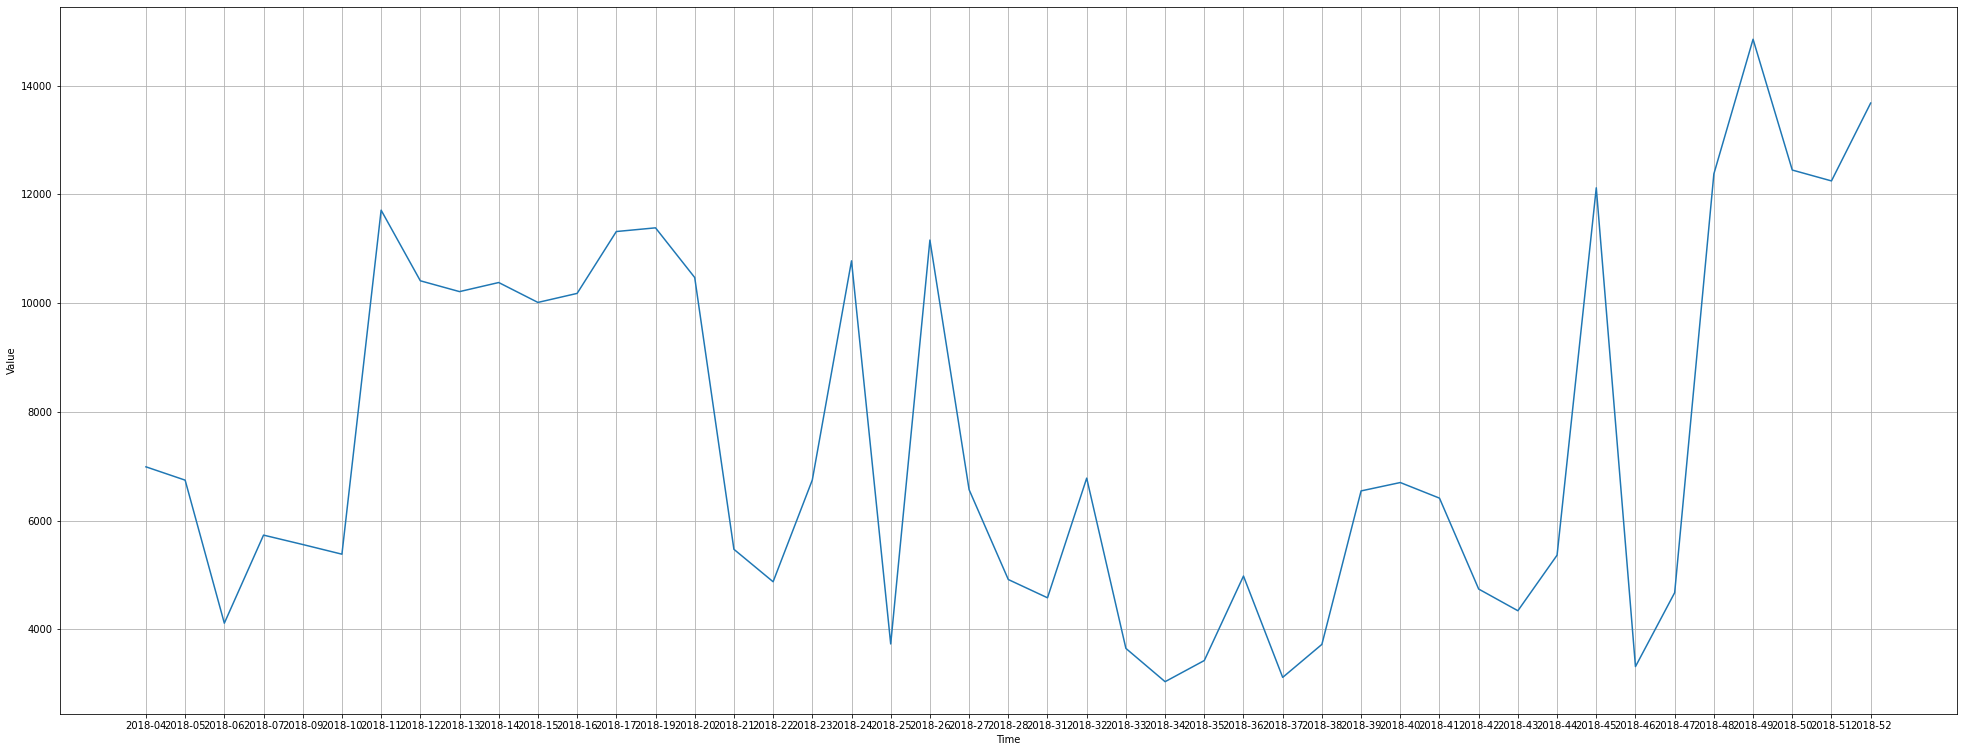

In [14]:
plt.figure(figsize=(34, 13))
plot_series(timeA, seriesA)

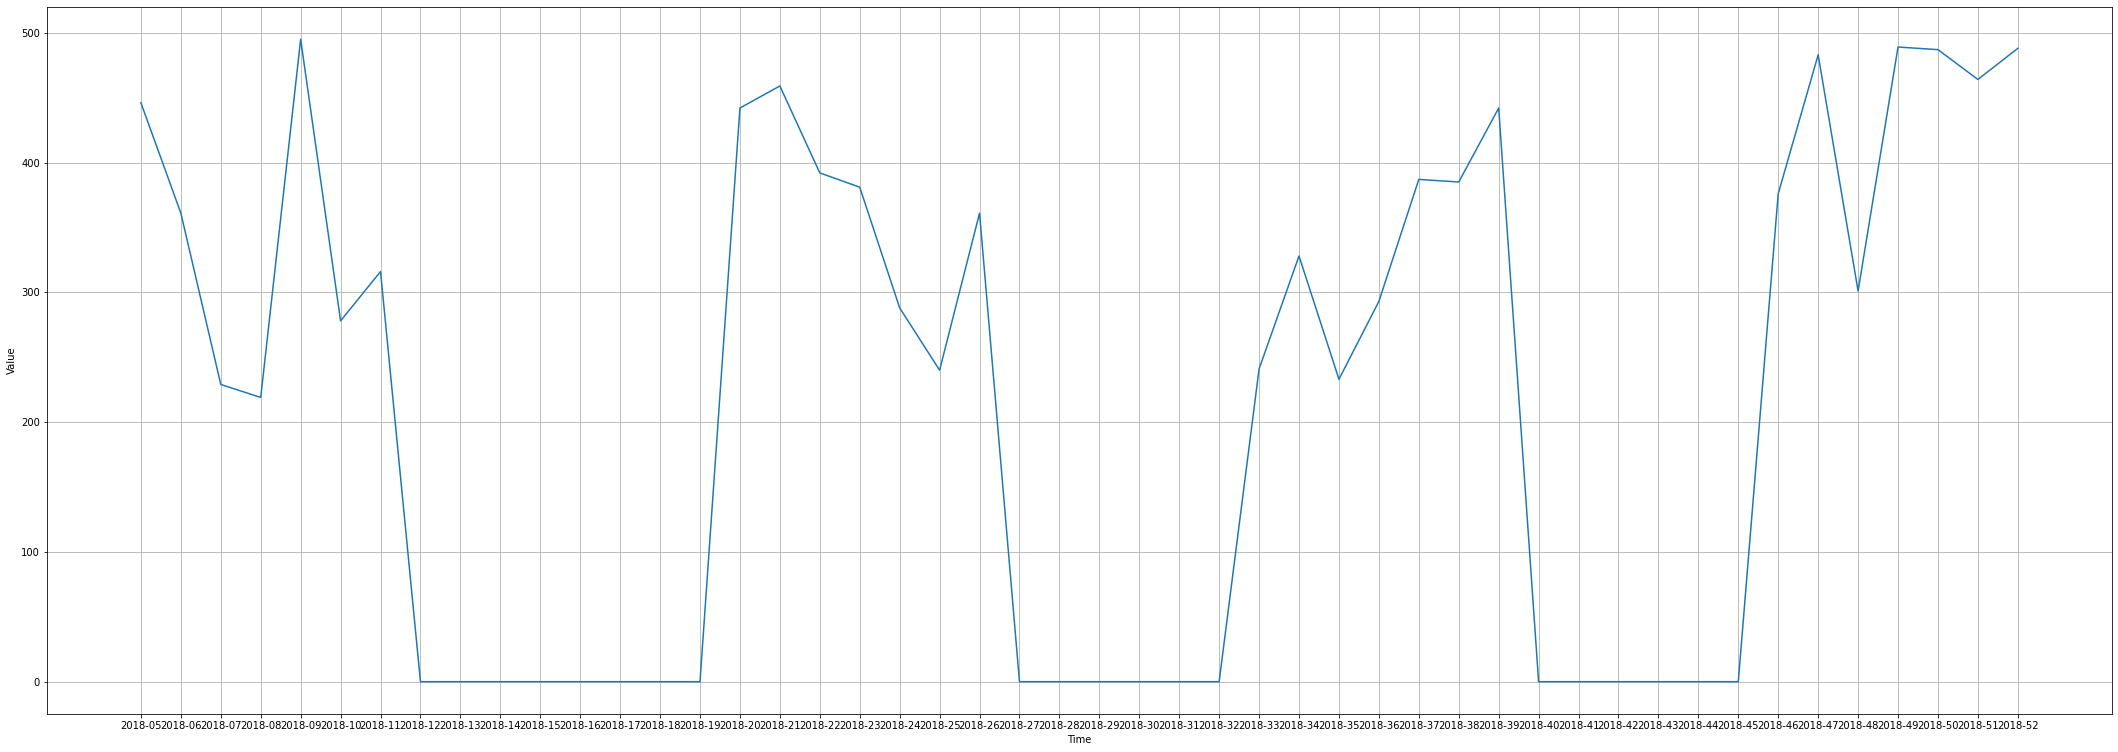

In [15]:
plt.figure(figsize=(37, 13))
plot_series(timeB, seriesB)

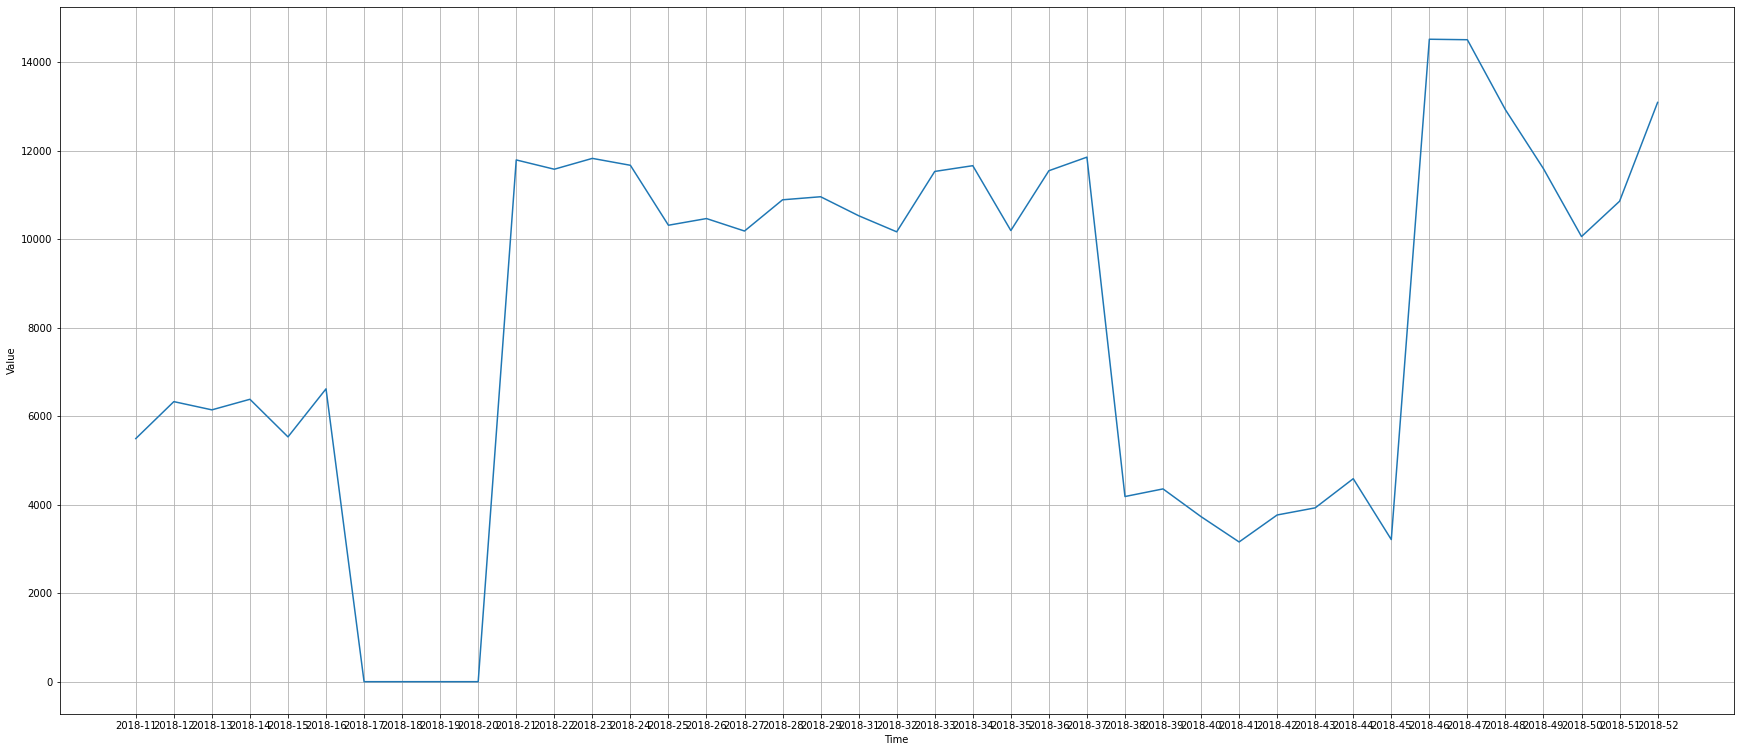

In [16]:
plt.figure(figsize=(30, 13))
plot_series(timeC, seriesC)

In [17]:
split_timeA = 34
time_trainA = timeA[:split_timeA]
x_trainA = seriesA[:split_timeA]
time_validA = timeA[split_timeA:]
x_validA = seriesA[split_timeA:]


In [18]:
split_timeB = 37
time_trainB = timeB[:split_timeB]
x_trainB = seriesB[:split_timeB]
time_validB = timeB[split_timeB:]
x_validB = seriesB[split_timeB:]


In [19]:
split_timeC = 30
time_trainC = timeC[:split_timeC]
x_trainC = seriesC[:split_timeC]
time_validC = timeC[split_timeC:]
x_validC = seriesC[split_timeC:]


In [20]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [21]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [22]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_setA = windowed_dataset(x_trainA, window_size=10, batch_size=10, shuffle_buffer=2)

In [23]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_setB = windowed_dataset(x_trainB, window_size=10, batch_size=10, shuffle_buffer=2)

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_setC = windowed_dataset(x_trainC, window_size=10, batch_size=10, shuffle_buffer=2)

In [25]:
modelA = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizerA = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
modelA.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizerA,
              metrics=["mae"])
historyA = modelA.fit(train_setA,epochs=500)

Epoch 1/500
3/3 [==============================] - 0s 33ms/step - loss: 7358.4204 - mae: 7358.9214
Epoch 2/500
3/3 [==============================] - 0s 15ms/step - loss: 7304.6606 - mae: 7305.1611
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 7235.3633 - mae: 7235.8638
Epoch 4/500
3/3 [==============================] - 0s 12ms/step - loss: 7109.7407 - mae: 7110.2407
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 6927.2749 - mae: 6927.7744
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: 6663.1152 - mae: 6663.6152

In [26]:
modelB = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizerB = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
modelB.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizerB,
              metrics=["mae"])
historyB = modelB.fit(train_setB,epochs=500)

Epoch 1/500
3/3 [==============================] - 0s 19ms/step - loss: 173.0159 - mae: 173.4796
Epoch 2/500
3/3 [==============================] - 0s 15ms/step - loss: 165.7525 - mae: 166.2509
Epoch 3/500
3/3 [==============================] - 0s 13ms/step - loss: 160.5948 - mae: 161.0914
Epoch 4/500
3/3 [==============================] - 0s 12ms/step - loss: 155.2441 - mae: 155.7408
Epoch 5/500
3/3 [==============================] - 0s 14ms/step - loss: 148.0620 - mae: 148.5597
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: 139.6326 - mae: 140.1315
Epoch 

In [27]:
modelC = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizerC = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
modelC.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizerC,
              metrics=["mae"])
historyC = modelC.fit(train_setC,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 8624.3418 - mae: 8624.8271
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 8603.8340 - mae: 8604.3340
Epoch 3/500
2/2 [==============================] - 0s 13ms/step - loss: 8566.5723 - mae: 8567.0713
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 8528.1201 - mae: 8528.6201
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 8502.3359 - mae: 8502.8359
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 8453.5830 - mae: 8454.0830

In [28]:
rnn_forecastA = model_forecast(modelA, seriesA[..., np.newaxis], 2)
rnn_forecastA = rnn_forecastA[split_timeA - 2:-1, -1, 0]

In [29]:
rnn_forecastB = model_forecast(modelB, seriesB[..., np.newaxis], 2)
rnn_forecastB = rnn_forecastB[split_timeB - 2:-1, -1, 0]

In [30]:
rnn_forecastC = model_forecast(modelC, seriesC[..., np.newaxis], 2)
rnn_forecastC = rnn_forecastC[split_timeC - 2:-1, -1, 0]

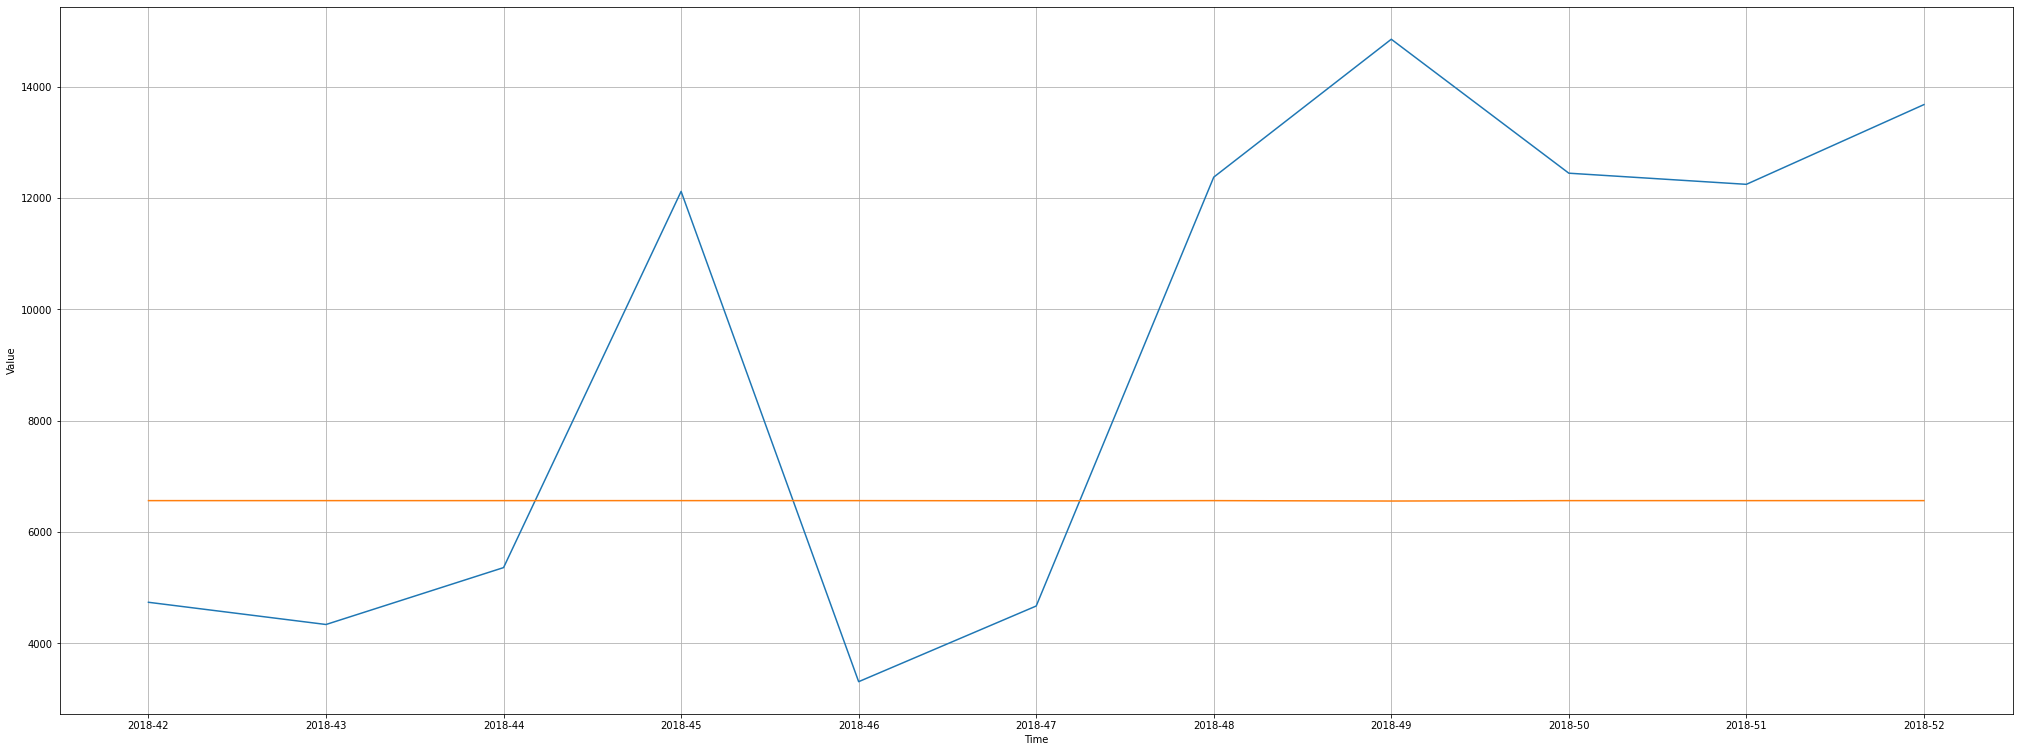

In [31]:
plt.figure(figsize=(35, 13))
plot_series(time_validA, x_validA)
plot_series(time_validA, rnn_forecastA)

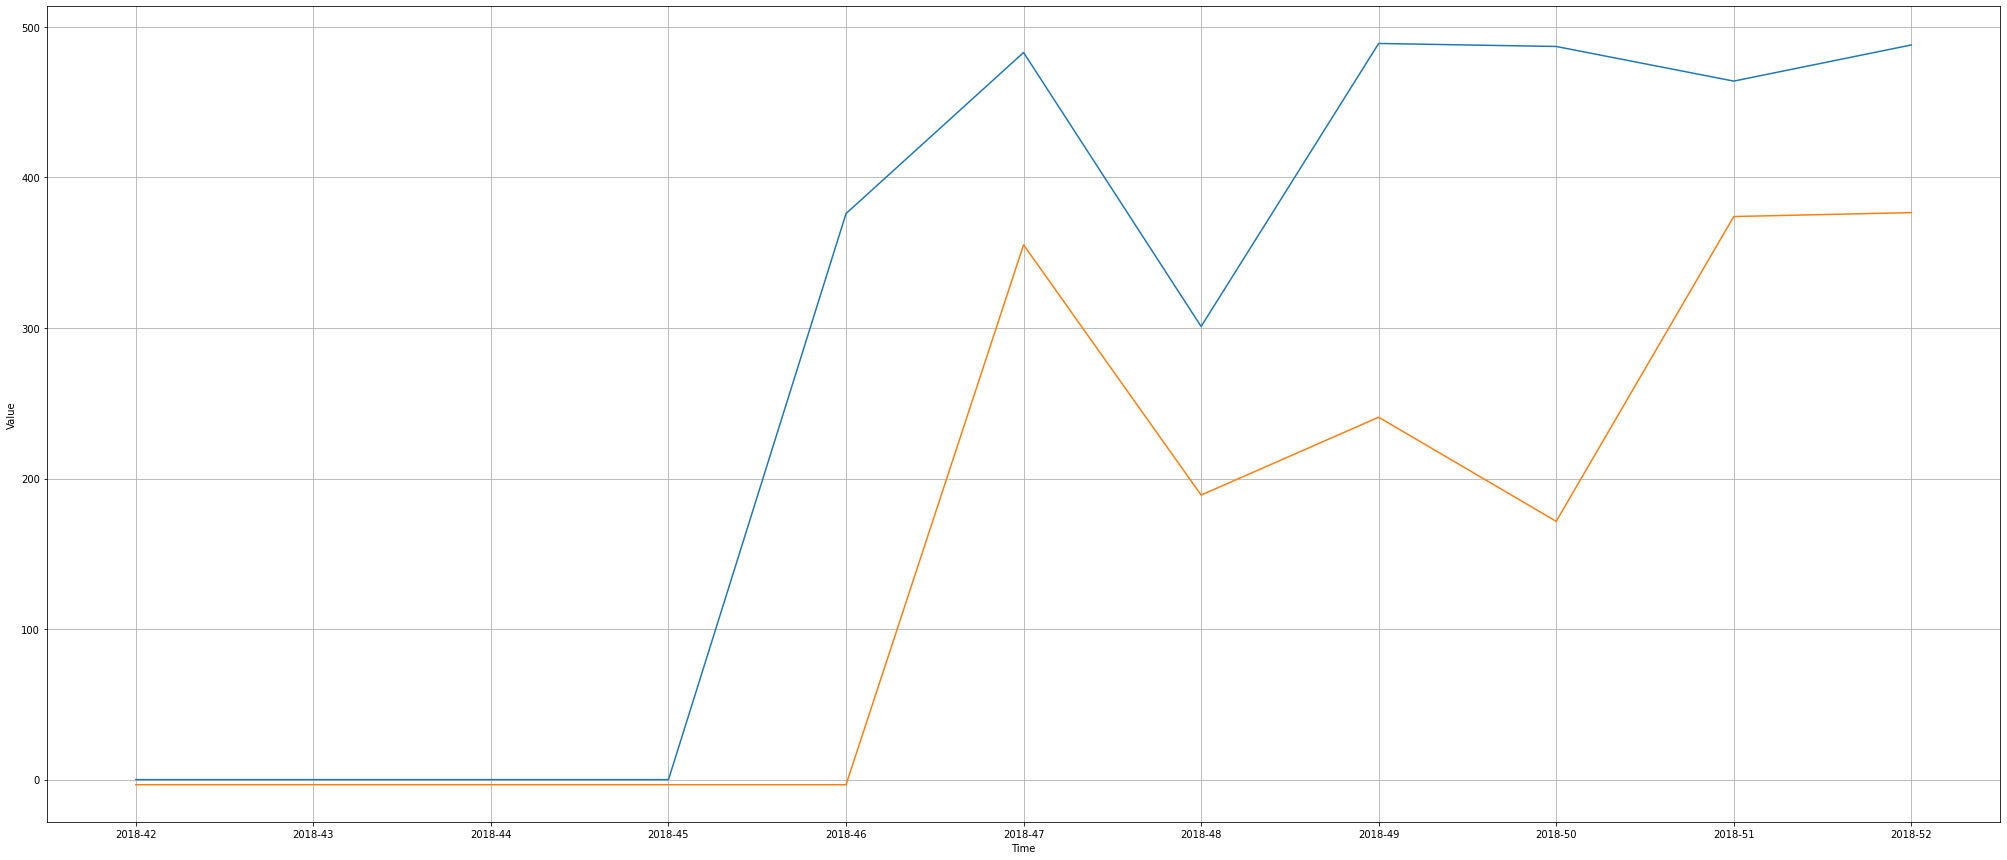

In [32]:
plt.figure(figsize=(35, 15))
plot_series(time_validB, x_validB)
plot_series(time_validB, rnn_forecastB)

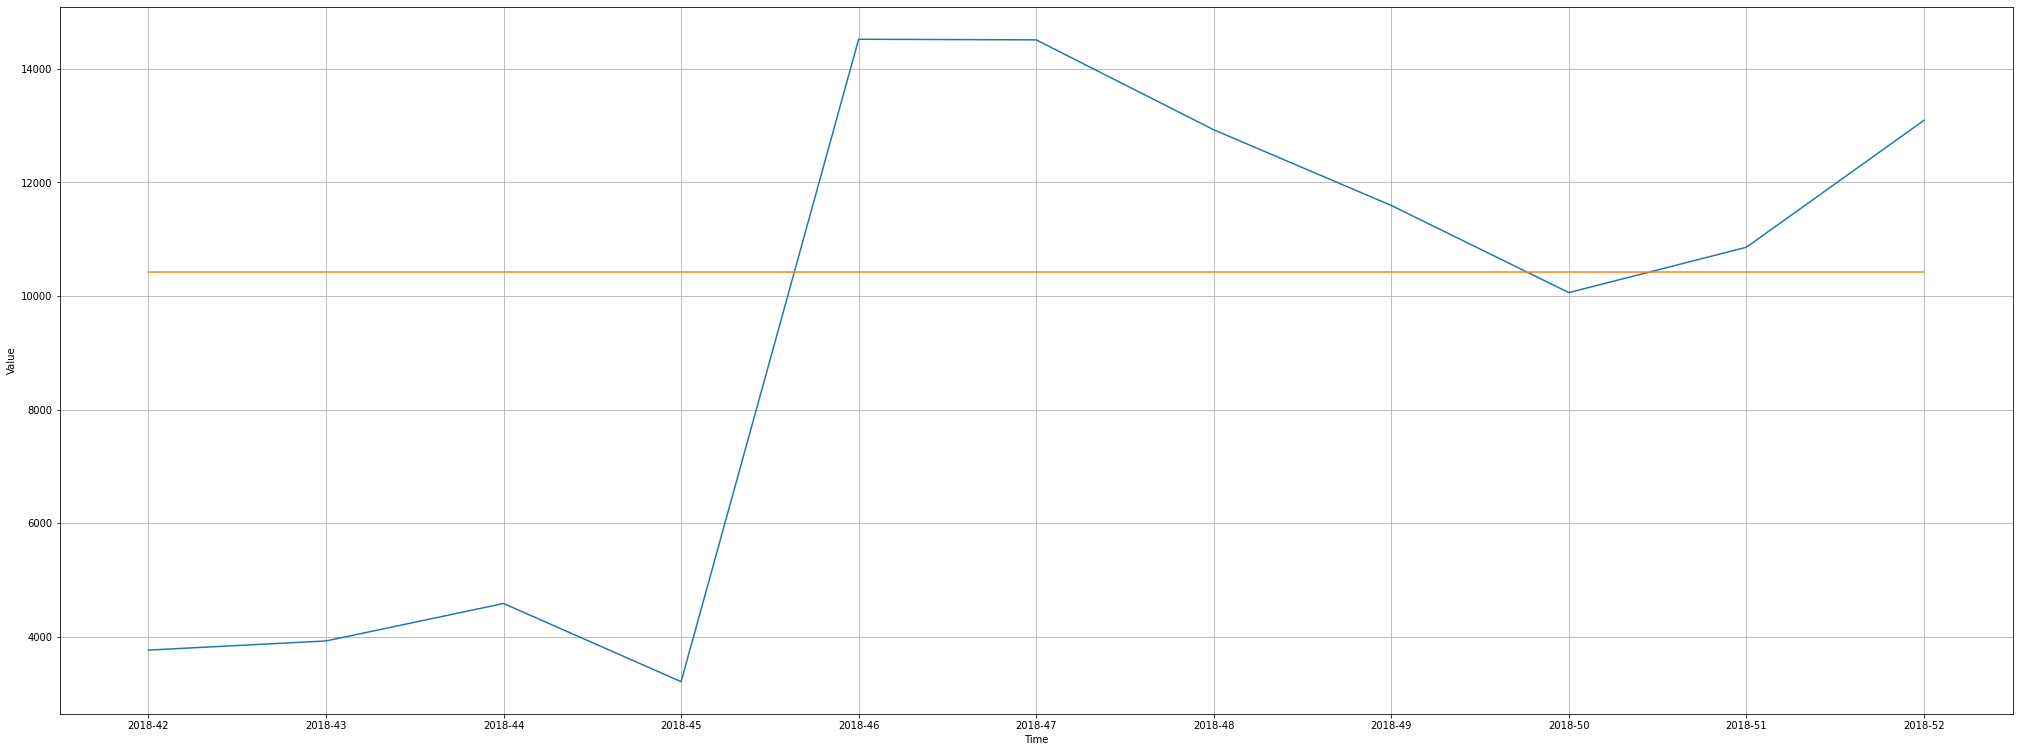

In [33]:
plt.figure(figsize=(35, 13))
plot_series(time_validC, x_validC)
plot_series(time_validC, rnn_forecastC)

In [34]:
tf.keras.metrics.mean_absolute_error(x_validA, rnn_forecastA).numpy()

4429.957

In [35]:
tf.keras.metrics.mean_absolute_error(x_validB, rnn_forecastB).numpy()

127.06788

In [36]:
tf.keras.metrics.mean_absolute_error(x_validC, rnn_forecastC).numpy()

3774.8806

In [37]:
print(rnn_forecastA)

[6565.9287 6565.9287 6565.9287 6565.9287 6565.9277 6563.1196 6565.9287
 6558.6646 6565.9287 6565.9287 6565.9287]


In [38]:
print(rnn_forecastB)

[ -3.3969328  -3.3969328  -3.3969328  -3.3969328  -3.3969328 355.25595
 189.01877   240.72409   171.57541   374.03064   376.63306  ]


In [39]:
print(rnn_forecastC)

[10423.3125 10423.3125 10423.311  10423.311  10423.3125 10423.3125
 10423.3125 10423.3125 10423.3125 10423.3125 10423.311 ]


In [40]:
import xlsxwriter
workbook = xlsxwriter.Workbook('output.xlsx')
worksheet = workbook.add_worksheet()
worksheet.write('A1', 'SKU')
worksheet.write('B1', 'ISO_Week')
worksheet.write('C1', 'Forecast')

i=2
for x in rnn_forecastA:
    worksheet.write('A'+str(i),'ProductA')
    worksheet.write('B'+str(i),'Week 2018-'+str((40+i)))
    worksheet.write('C'+str(i),x)
    i=i+1

j=2  
for x in rnn_forecastB:
    worksheet.write('A'+str(i),'ProductB')
    worksheet.write('B'+str(i),'Week 2018-'+str((40+j)))
    worksheet.write('C'+str(i),x)
    j=j+1
    i=i+1
 
k=2
for x in rnn_forecastC:
    worksheet.write('A'+str(i),'ProductC')
    worksheet.write('B'+str(i),'Week 2018-'+str((40+k)))
    worksheet.write('C'+str(i),x)
    i=i+1
    k=k+1


workbook.close()